In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop

max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
max_len = 100

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [54]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           640000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 100, 32)           3104      
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                51216     
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
Total params: 694,354
Trainable params: 694,354
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 21s 117ms/step - loss: 0.4992 - acc: 0.7433 - val_loss: 0.4754 - val_acc: 0.7712
Epoch 2/10
157/157 [==============================] - 18s 112ms/step - loss: 0.2788 - acc: 0.8862 - val_loss: 0.3933 - val_acc: 0.8336
Epoch 3/10
157/157 [==============================] - 18s 114ms/step - loss: 0.1320 - acc: 0.9535 - val_loss: 0.4922 - val_acc: 0.8094
Epoch 4/10
157/157 [==============================] - 19s 123ms/step - loss: 0.0377 - acc: 0.9900 - val_loss: 0.7111 - val_acc: 0.8020
Epoch 5/10
157/157 [==============================] - 17s 111ms/step - loss: 0.0110 - acc: 0.9969 - val_loss: 0.8678 - val_acc: 0.7948
Epoch 6/10
157/157 [==============================] - 18s 112ms/step - loss: 0.0053 - acc: 0.9984 - val_loss: 1.0049 - val_acc: 0.7894
Epoch 7/10
157/157 [==============================] - 18s 113ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 1.1367 - val_acc: 0.7994
Epoch 8/10
157/157 [==============================] - 1

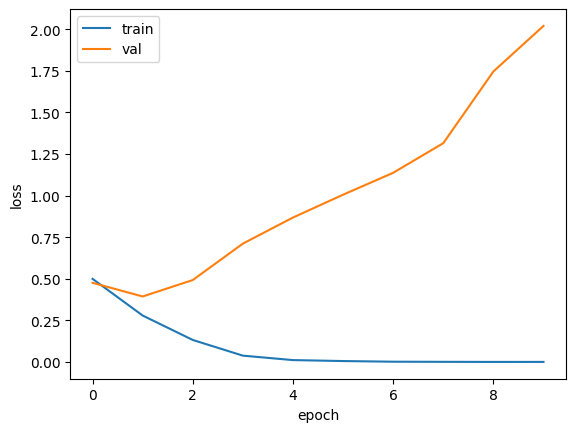

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

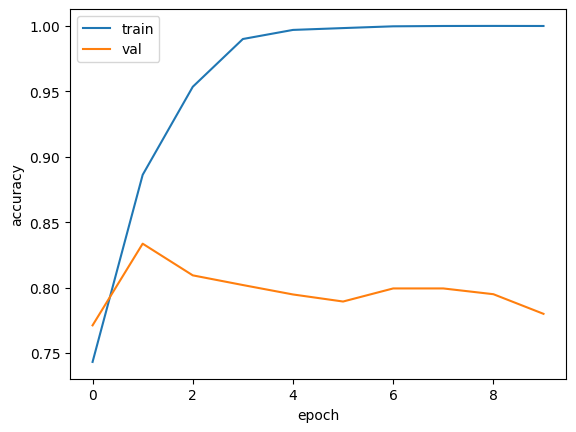

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 14s 18ms/step - loss: 1.9559 - acc: 0.7840


In [9]:
print('test_acc:', test_acc)

test_acc: 0.7839999794960022
